In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

Use a k-neighbours model to classify the following dataset. Try several values of $k$. 

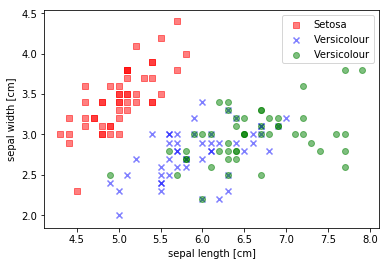

In [8]:
data_dic = datasets.load_iris()
features = data_dic['data']
targets = data_dic['target']

c1 = features[targets==0]
c2 = features[targets==1]
c3 = features[targets==2]

ind1, ind2 = 0,1
plt.scatter(c1[:,ind1],c1[:,ind2], color='red', marker='s', alpha=0.5, label="Setosa")
plt.scatter(c2[:,ind1],c2[:,ind2], color='blue', marker='x', alpha=0.5, label="Versicolour")
plt.scatter(c3[:,ind1],c3[:,ind2], color='green', marker='o', alpha=0.5, label="Versicolour")
plt.legend()
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]");
def subSample(nData):
    X = np.empty((3*nData,2))
    X[:nData] = c1[:nData,(ind1, ind2)]
    X[nData:2*nData] = c2[:nData,(ind1, ind2)]
    X[2*nData:] = c3[:nData,(ind1, ind2)]
    Y = np.empty(3*nData)
    Y[:nData] = np.zeros(nData)
    Y[nData:2*nData] = np.ones(nData)
    Y[2*nData:] = 2*np.ones(nData)
    return X,Y

X, Y = subSample(50)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
resolution=0.01

def regions3(X, y, classifier, colors = ['red','blue','green']):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # inverse scaling of xx1 and xx2
    rescaledX = scaler.inverse_transform(np.array([xx1.ravel(), xx2.ravel()]).T)

    xx1_rescaled = rescaledX[:,0].reshape(xx1.shape)
    xx2_rescaled = rescaledX[:,1].reshape(xx2.shape)

    plt.contourf(xx1_rescaled, xx2_rescaled, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1_rescaled.min(), xx1_rescaled.max())
    plt.ylim(xx2_rescaled.min(), xx2_rescaled.max())
    
    c2 = scaler.inverse_transform(X[y==2])
    c1 = scaler.inverse_transform(X[y==1])
    c0 = scaler.inverse_transform(X[y==0])
    
    xb,yb=c0[:,0],c0[:,1]
    plt.scatter(xb,yb,color=colors[0],alpha=0.4)
    xb,yb=c1[:,0],c1[:,1]
    plt.scatter(xb,yb,color=colors[1],alpha=0.4)
    xb,yb=c2[:,0],c2[:,1]
    plt.scatter(xb,yb,color=colors[2],alpha=0.4)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]');

In [6]:
# YOUR CODE HERE


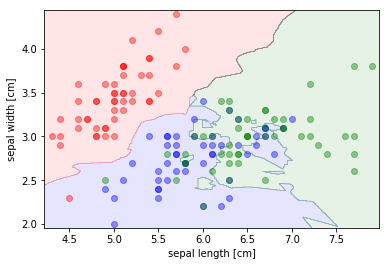

In [14]:
knn = KNeighborsClassifier(5)
knn.fit(X, Y)
regions3(X, Y, knn)